<a href="https://colab.research.google.com/github/SaravanavelE/TechnoHacks/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORT THE NECCESSORY LIBRARIES***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

***IMPORT THE DATASET***

In [5]:
d=pd.read_csv("/content/drive/MyDrive/techh/cus det/Telco-Customer-Churn.csv")
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***SPLIT THE DATASET INTO X & Y***

In [13]:
x=pd.DataFrame(d,columns=['Partner','tenure','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])
y=pd.DataFrame(d,columns=['Churn'])
print(x.head())
print(y.head())

  Partner  tenure PhoneService OnlineSecurity DeviceProtection TechSupport  \
0     Yes       1           No             No               No          No   
1      No      34          Yes            Yes              Yes          No   
2      No       2          Yes            Yes               No          No   
3      No      45           No            Yes              Yes         Yes   
4      No       2          Yes             No               No          No   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  
  Churn
0    No
1    No
2   Yes
3    No
4   Yes


***LABEL ENCODER FOR ENCODING THE FEATURES***

In [14]:
le = LabelEncoder()

x['Partner'] = le.fit_transform(x['Partner'])
x['PhoneService'] = le.fit_transform(x['PhoneService'])
x['OnlineSecurity'] = le.fit_transform(x['OnlineSecurity'])
x['DeviceProtection'] = le.fit_transform(x['DeviceProtection'])
x['OnlineSecurity'] = le.fit_transform(x['OnlineSecurity'])
x['TechSupport'] = le.fit_transform(x['TechSupport'])
x['PaperlessBilling'] = le.fit_transform(x['PaperlessBilling'])
x['PaymentMethod'] = le.fit_transform(x['PaymentMethod'])

y['Churn'] = le.fit_transform(y['Churn'])

print(x.head())
print(y.head())


   Partner  tenure  PhoneService  OnlineSecurity  DeviceProtection  \
0        1       1             0               0                 0   
1        0      34             1               2                 2   
2        0       2             1               2                 0   
3        0      45             0               2                 2   
4        0       2             1               0                 0   

   TechSupport  PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  
0            0                 1              2           29.85        29.85  
1            0                 0              3           56.95       1889.5  
2            0                 1              3           53.85       108.15  
3            2                 0              0           42.30      1840.75  
4            0                 1              2           70.70       151.65  
   Churn
0      0
1      0
2      1
3      0
4      1


***SPLIT THE DATASET INTO TRAINING AND TESTING DATASET***

In [17]:
for column in x.columns:
    x[column] = pd.to_numeric(x[column], errors='coerce')
x = x.fillna(x.mean())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 10), (1409, 10), (5634, 1), (1409, 1))

***LINEAR REGRESSION MODEL***

In [18]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr

LinearRegression()

***PREDICTION***

In [19]:
y_pred = lr.predict(x_test)
y_pred

array([[ 0.04650027],
       [ 0.09915294],
       [ 0.43264508],
       ...,
       [ 0.14895062],
       [-0.07364313],
       [ 0.364113  ]])

***MEAN SQUARED ERROR***

In [20]:
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.13545413714530344


***PLOT HISTOGRAMS FOR EACH FEATURE***

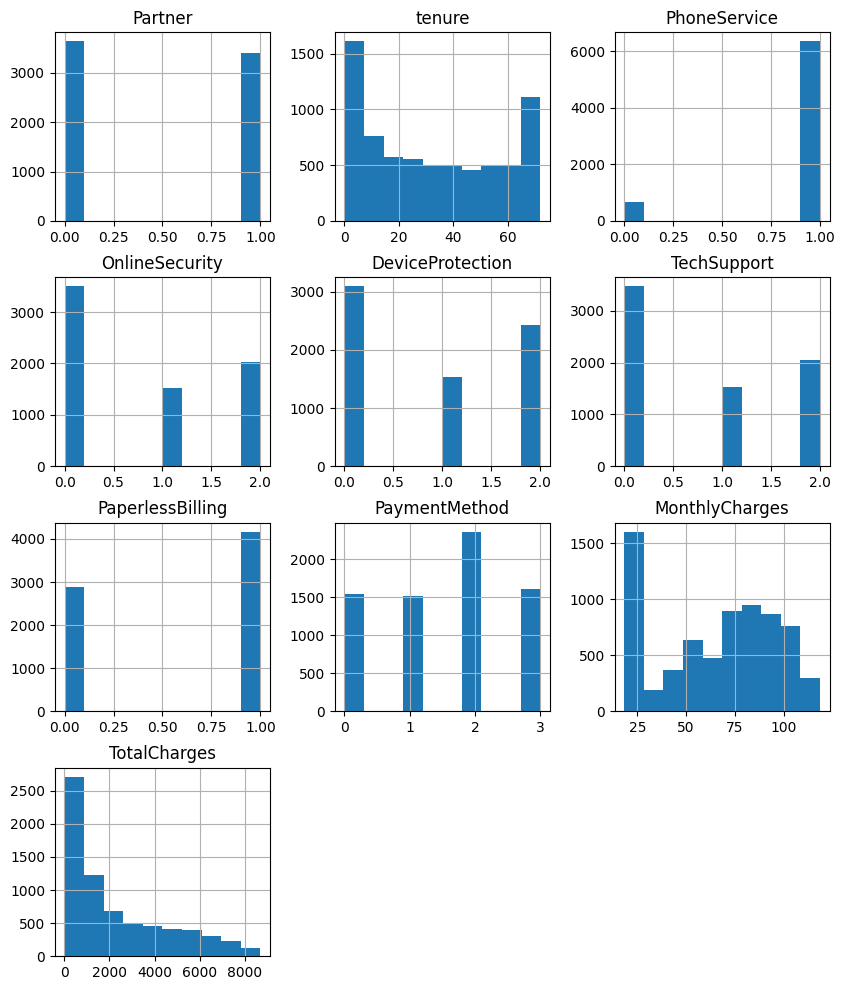

None


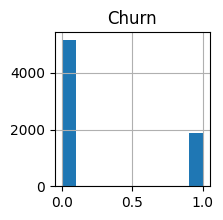

None


In [37]:
x.hist(figsize=(10, 12))
print(plt.show())
y.hist(figsize=(2,2))
printr(plt.show())

***CORRELATION MATRIX***

In [22]:
corr_matrix = x.corr()
print("correlation Matrix:\n\n",corr_matrix)

correlation Matrix:

                    Partner    tenure  PhoneService  OnlineSecurity  \
Partner           1.000000  0.379697      0.017706        0.150828   
tenure            0.379697  1.000000      0.008448        0.325468   
PhoneService      0.017706  0.008448      1.000000       -0.015198   
OnlineSecurity    0.150828  0.325468     -0.015198        1.000000   
DeviceProtection  0.166330  0.371105      0.003727        0.175985   
TechSupport       0.126733  0.322942     -0.019158        0.285028   
PaperlessBilling -0.014877  0.006152      0.016505       -0.157641   
PaymentMethod    -0.154798 -0.370436     -0.004184       -0.096726   
MonthlyCharges    0.096848  0.247900      0.247398       -0.053878   
TotalCharges      0.318812  0.824757      0.112851        0.254308   

                  DeviceProtection  TechSupport  PaperlessBilling  \
Partner                   0.166330     0.126733         -0.014877   
tenure                    0.371105     0.322942          0.006152   


***HEAT MAP***

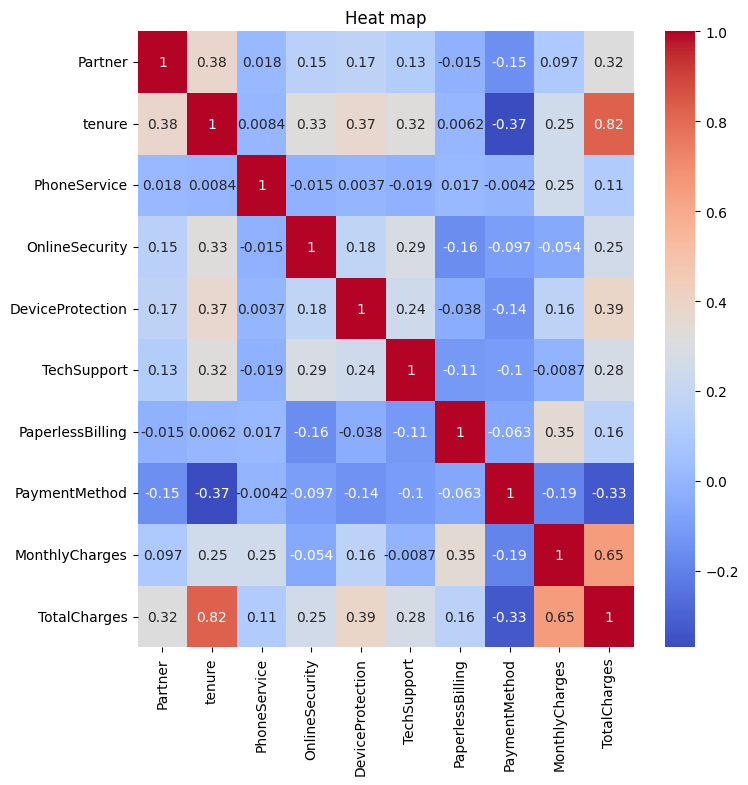

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat map')
plt.show()